In [1]:
import os

import pandas as pd
import plotly.express as px
import plotly.offline as pyo
import plotly.io as pio
pyo.init_notebook_mode(connected=True)
# pio.renderers.default = "browser"


# load .env file
project_path = os.path.abspath('../../')
dotenv_path = os.path.join(project_path, 'secret', '.env')
from dotenv import load_dotenv
load_dotenv(dotenv_path)
print(os.getenv("SISI_DB_TYPE"))

# load project variables
from core.ShoreNet.definitions.variables import VariablesManager

var = VariablesManager(stage_env)
print(var.data_path)

mysql
dict_items([('ship_statics_path', 'D:\\data\\sisi\\statics'), ('output_path', 'output'), ('test_analyze_source_data_path', 'tests\\shared_data\\analyze\\source'), ('test_analyze_result_data_path', 'tests\\shared_data\\analyze\\result')])
D:\data\sisi\


In [2]:
from sqlalchemy import text

from core.ShoreNet.statics.filter import clean_up_statics
from core.ShoreNet.definitions.parameters import TableNames as tbn

# load ships statics data
coal_static_query = f"""
SELECT
    mmsi, ship_name, ship_type, length, width, dwt
FROM
    sisi.{tbn.dim_ships_statics_table_name}
"""

statics_df = pd.read_sql(
    sql=text(coal_static_query), con=var.engine
)
statics_df = clean_up_statics(statics_df)
print(statics_df.shape)


(11935, 7)


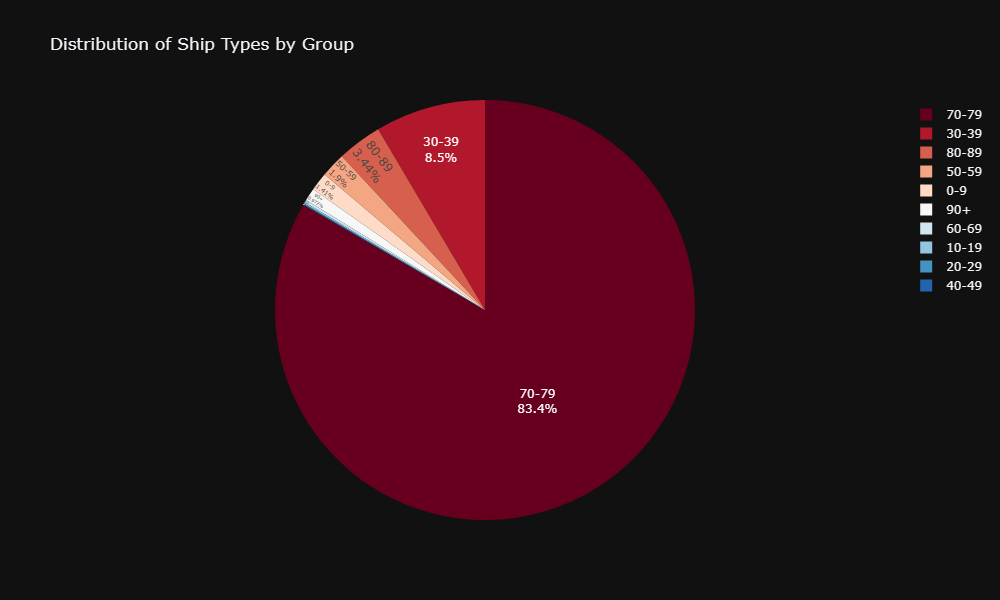

In [3]:
# Define bins for ship types
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, float('inf')]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

# Bin the ship_type data
statics_df['ship_type_group'] = pd.cut(statics_df['ship_type'], bins=bins, labels=labels, right=False)

# Calculate the count for each group
group_counts = statics_df['ship_type_group'].value_counts().sort_index()

# Prepare data for pie chart
pie_data = pd.DataFrame({'ship_type_group': group_counts.index, 'count': group_counts.values})

# Create a pie chart using Plotly
fig = px.pie(
    pie_data,
    names='ship_type_group',
    values='count',
    title='Distribution of Ship Types by Group',
    color_discrete_sequence=px.colors.sequential.RdBu
)

# Add annotations for each group
fig.update_traces(textposition='inside', textinfo='percent+label')

# Adjust layout
fig.update_layout(
    height=600,
    width=1000
)

fig.show(renderer='png')